# EXPERIMENTATION
Before starting off with the project a brief experiment is done to demonstrate the process of colour segmentation



# STEP1:Read the image

In [20]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('RED_DOT.jpg')

# STEP2: Display the image

In [33]:
cv2.imshow('img',Open)
cv2.waitKey(0)
cv2.destroyAllWindows()

# STEP3: Convert color space and create image mask

In [81]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_red=np.array((160,100,100))
upper_red=np.array((179,255,255))
mask = cv2.inRange(hsv,lower_red,upper_red)

kernel = np.ones(shape=(3,3))




Close = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel,iterations=3)

res=cv2.bitwise_and(img,img,mask=Close)


# STEP4: Display the resulting image

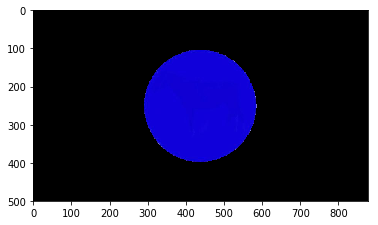

In [83]:
plt.imshow(res)
plt.show()

# STEP5: Load Video Source and apply the above filter to it

In [110]:
lower_red = np.array((160,100,100))
upper_red = np.array((179,255,255))
kernel = np.ones((3,3))
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv,lower_red,upper_red)
    #med = cv2.medianBlur(mask,3)
    #maskOpen = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
    
    maskClose = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel,iterations =3)
    
    res=cv2.bitwise_and(frame,frame,mask=maskClose)
    
    
    cv2.findContours(res,cv2.RETR_EXTERNAL)
    cv2.imshow('frame',res)
    if(cv2.waitKey(1) & 0xff == ord('q')):
        break
cap.release()
cv2.destroyAllWindows()